In [97]:
%matplotlib inline

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os

In [99]:
# Files to load.

city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"

In [100]:
# Read the city file using file path.

pd.read_csv("Resources/city_data.csv")

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [101]:
# Read the city file using the variable "city_data_to_load" and store it in a DataFrame.

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [102]:
# Read the ride file and store it in a DataFrame.

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [103]:
# Get the columns and rows that are NOT null.

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [104]:
# Above, all columns contain the same # of rows. Use the isnull() with sum() to double-check.

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [105]:
# Get data types for each column.

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [106]:
# Get number of unique values for types of city.

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [107]:
# Get the number of data points for URBAN cities.

sum(city_data_df["type"] == "Urban")

66

In [108]:
# Get the number of data points for SUBURBAN cities.

sum(city_data_df["type"] == "Suburban")

36

In [109]:
# Get the number of data points for RURAL cities.

sum(city_data_df["type"] == "Rural")

18

In [110]:
# Get the columns and rows that are NOT null in the "ride" data.

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [111]:
# Above, all columns contain the same # of rows. Use the isnull() with sum() to double-check.

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [112]:
# Get data types for each column.

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [113]:
# MERGE both DFs into a single dataset using the "city" column they both have in common. 

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [114]:
# Create a bubble chart or scatter plot. NOTE: Create DataFrames for each "type" first.

driver_count_type = city_data_df.groupby(['type'])['driver_count'].sum

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [115]:
rural_cities_df.head()


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [116]:
# Get the number of rides for each city type.

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [117]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [118]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [119]:
# Get the average fare for each city type.

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [120]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare.head()


city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [121]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare.head()


city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [122]:
# Get the average number of drivers for each city type.

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [123]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count.head()


city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [124]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count.head()


city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

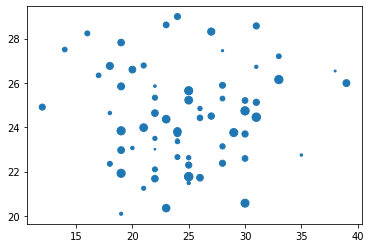

In [125]:
# Create the Urban Cities bubble chart or scatter plot. Make markers' size correlate with driver_count.

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=urban_driver_count)


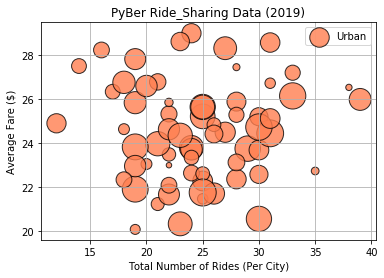

In [126]:
# Format the Urban Cities bubble chart.

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.title("PyBer Ride_Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

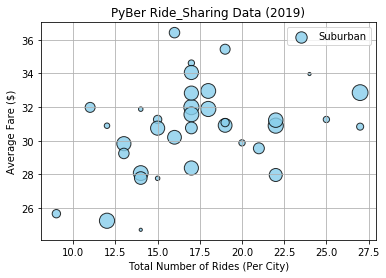

In [127]:
# Create the Suburban Cities bubble chart.

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.title("PyBer Ride_Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


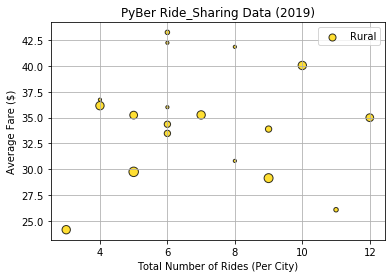

In [128]:
# Create the Rural Cities bubble chart.

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

plt.title("PyBer Ride_Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


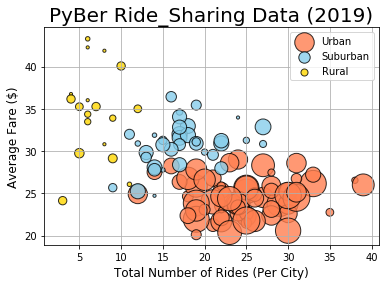

In [129]:
# Combine all 3 bubble charts, but leave titles at the end since they're the same for all 3 charts.

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# Incorporate titles and increase font size.

plt.title("PyBer Ride_Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

plt.legend()


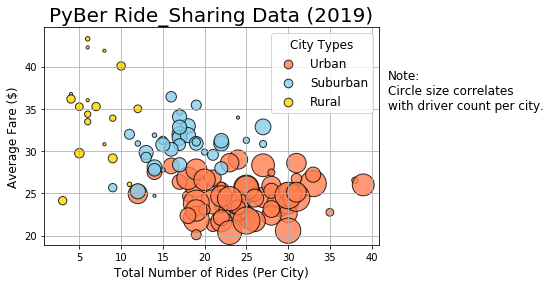

In [130]:
# Updating the LEGEND (see legend section towards the bottom).

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

plt.title("PyBer Ride_Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Update the LEGEND.

lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Add a NOTE using the plt.text() function. REMEMBER the 1st 2 numbers are the (x,y) coordinates.
# This adds the NOTE to the right of the legend.

plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure using the plt.savefig() function ...Add a direct path to the "Analysis" folder & filename.

plt.savefig("Analysis/Fig1.png")

plt.show()

In [131]:
# Use the describe() function to obtain summary stats on Urban, Suburban, and Rural DataFrames.

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [132]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [133]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [136]:
# Use describe() on ride_count Series to answer section 5.4.1 questions.

suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [137]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [138]:
# Calculate the mean of the ride_count for each city type using Pandas mean() function.

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)


(24.62, 17.36, 6.94)

In [139]:
# Calculate the median of the ride_count for each city type using Pandas median() function.
# Urban median of 24.0 was marked incorrect in the lesson question; it was marked correct when I entered 24.

round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)


(24.0, 17.0, 6.0)

In [140]:
# Calculate the mode of the ride_count for each city type using Pandas mode() function.

round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)


(0    22
 1    25
 dtype: int64, 0    17
 dtype: int64, 0    6
 dtype: int64)

In [141]:
round(suburban_ride_count.mode(),2)

0    17
dtype: int64

In [142]:
suburban_ride_count.mode()


0    17
dtype: int64

In [143]:
# Numpy mean() & median() functions, and SciPy mode() function: Optional approaches in case you're not working
# on a Jupyter Notebook.

import numpy as np
import scipy.stats as sts

In [153]:
mean_urban_ride_count = np.mean(urban_ride_count)

print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

The mean for the ride counts for urban trips is 24.62.


In [155]:
median_urban_ride_count = np.median(urban_ride_count)

print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

The median for the ride counts for urban trips is 24.0.


In [156]:
# Scipy mode() function.

mode_urban_ride_count = sts.mode(urban_ride_count)

print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [157]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)

print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [158]:
mode_rural_ride_count = sts.mode(rural_ride_count)

print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [159]:
# Summary stats for the "fare" by city type: Get the fares from the "fare" column in each city type DF.

urban_fares = urban_cities_df["fare"]

urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [162]:
# Calculate the measures of central tendency for the AVG fare for urban cities.

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price of urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price of urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [166]:
# Summary stats for suburban cities.

suburban_fares = suburban_cities_df["fare"]

suburban_fares.head()


1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [165]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price of suburban trips is {mode_suburban_fares}.")


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price of suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [167]:
# Summary stats for rural cities.

rural_fares = rural_cities_df["fare"]

rural_fares.head()


2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [168]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price of rural trips is {mode_rural_fares}.")


The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price of rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [169]:
# Summary stats for the number of drivers in urban citites.

urban_drivers = urban_cities_df['driver_count']

urban_drivers.head()


0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [171]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The drivers mean for urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The drivers median for urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The drivers mode for urban cities is {mode_urban_drivers}.")


The drivers mean for urban cities is 36.68.
The drivers median for urban cities is 37.00.
The drivers mode for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [172]:
# Summary stats for the number of drivers in suburban citites.

suburban_drivers = suburban_cities_df['driver_count']

suburban_drivers.head()


1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [173]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The drivers mean for suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The drivers median for suburban cities is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The drivers mode for suburban cities is {mode_suburban_drivers}.")


The drivers mean for suburban cities is 13.71.
The drivers median for suburban cities is 16.00.
The drivers mode for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [174]:
# Summary stats for the number of drivers in rural citites.

rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()


2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [175]:
mean_rural_drivers = np.mean(rural_drivers)
print(f"The drivers mean for rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The drivers median for rural cities is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The drivers mode for rural cities is {mode_rural_drivers}.")


The drivers mean for rural cities is 4.30.
The drivers median for rural cities is 4.00.
The drivers mode for rural cities is ModeResult(mode=array([1]), count=array([32])).


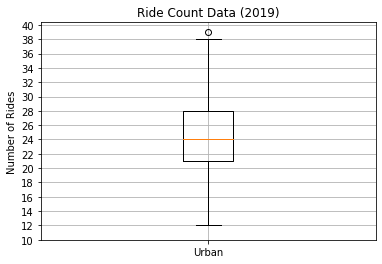

In [176]:
# Create a box-and-whisker plot for the urban cities ride count. Add titles and labels as well.

x_labels = ["Urban"]

fig, ax = plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))

ax.grid()

plt.show()


In [177]:
'''Above chart tells us there's one outlier, 39 / Max value = 39 / Min value = 12 / Mean = 24 or 50th percentile,
STDEV is approx. 5 because the box upper and lower boundaries represent the upper & lower quartiles = upper 28 -
lower 23 = 5.'''

# Use the describe() function to double-check stats.

urban_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

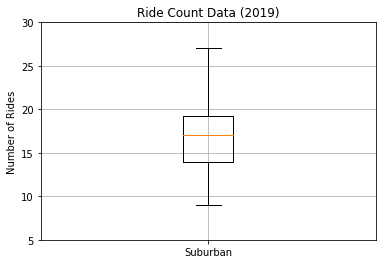

In [186]:
# Create a box-and-whisker plot for the suburban cities ride count. Add titles and labels as well.
'''Below chart tells us there are no outliers / Max value = 27 / Min value = 9 / Mean = 17 or 50th percentile,
STDEV is approx. 5 because the box upper and lower boundaries represent the upper & lower quartiles = upper 19 -
lower 14 = 5.'''

x_labels = ["Suburban"]

fig, ax = plt.subplots()

ax.boxplot(suburban_ride_count, labels=x_labels)

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 31, step=5.0))

ax.grid()

plt.show()



In [179]:
# Use the describe() function to double check stats.

suburban_ride_count.describe()


count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

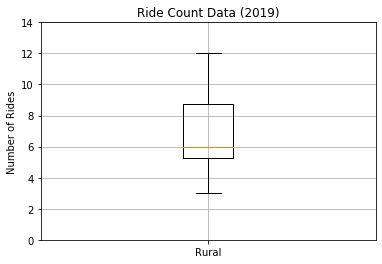

In [191]:
# Create a box-and-whisker plot for the rural cities ride count. Add titles and labels as well.
'''Below chart tells us there are no outliers / Max value = 12 / Min value = 3 / Mean = 6 or 50th percentile,
STDEV is approx. 3 because the box upper and lower boundaries represent the upper & lower quartiles = upper 8.5 -
lower 5.5 = 3.'''

x_labels = ["Rural"]

fig, ax = plt.subplots()

ax.boxplot(rural_ride_count, labels=x_labels)

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 15, step=2.0))

ax.grid()

plt.show()


In [192]:
# Use the describe() function to double check stats.

rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

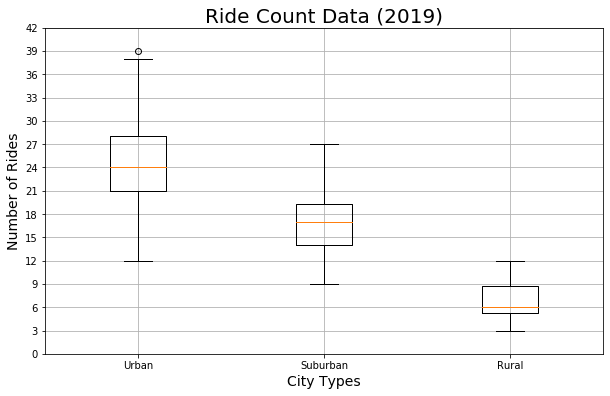

In [193]:
# Combine all city types box-and-whisker plots into one & additional formatting.

x_labels = ["Urban", "Suburban", "Rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))

ax.grid()

plt.savefig("Analysis/Fig2.png")

plt.show()


In [195]:
'''The "ALL city types chart" shows us there is one outlier in the urban cities type (39). Also, the AVG number
of rural rides (6) is about 4 times lower than urban cities (24), and about 3 times lower than suburban cities (18)'''

urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [197]:
# Find the outlier (39) in urban cities by creating a new variable to find all "True" values that equal 39. Then,
# filter the urban_ride_count Series for all "True" values and get the city name from index or col 0 ("City").

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


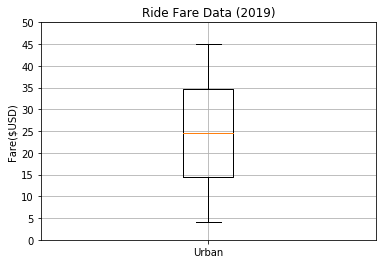

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [199]:
# Create a box-and-whisker plot for the urban cities fare data. Add titles & labels. Add summary stats at bottom.

x_labels = ["Urban"]

fig, ax = plt.subplots()

ax.boxplot(urban_fares, labels=x_labels)

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")
urban_fares.describe()


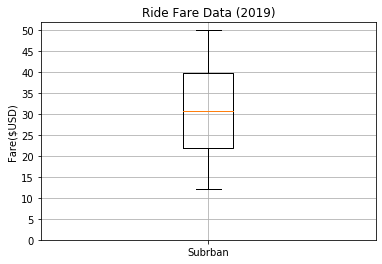

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [200]:
'''SKILL DRILL: Create a box-and-whisker plot for the suburban cities fare data. Add titles & labels. 
Add summary stats at bottom.'''

x_labels = ["Suburban"]

fig, ax = plt.subplots()

ax.boxplot(suburban_fares, labels=x_labels)

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")
suburban_fares.describe()


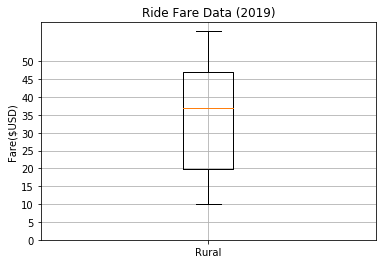

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [201]:
'''SKILL DRILL: Create a box-and-whisker plot for the rural cities fare data. Add titles & labels. 
Add summary stats at bottom.'''

x_labels = ["Rural"]

fig, ax = plt.subplots()

ax.boxplot(rural_fares, labels=x_labels)

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")
rural_fares.describe()


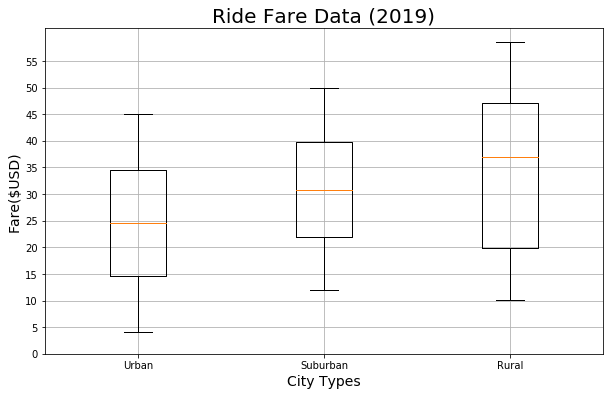

In [204]:
'''SKILL DRILL: Combine all city types fare data box-and-whisker plots into one, additional formatting, and
save as Fig3.png in the "Analysis" folder.'''

x_labels = ["Urban", "Suburban", "Rural"]

fares_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)

ax.boxplot(fares_data, labels=x_labels)

ax.set_yticks(np.arange(0, 60, step=5.0))

ax.grid()

plt.savefig("Analysis/Fig3.png")

plt.show()


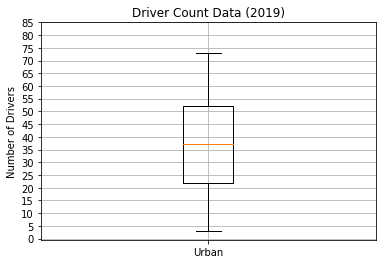

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [205]:
# Create a box-and-whisker plot for urban cities driver count data. Add titles & labels. Add summary stats at bottom.

x_labels = ["Urban"]

fig, ax = plt.subplots()

ax.boxplot(urban_drivers, labels=x_labels)

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")
urban_drivers.describe()


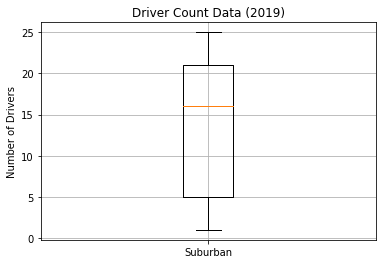

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [214]:
'''SKILL DRILL: Create a box-and-whisker plot for suburban cities driver count data. Add titles & labels. 
Add summary stats at bottom.'''

x_labels = ["Suburban"]

fig, ax = plt.subplots()

ax.boxplot(suburban_drivers, labels=x_labels)

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 30, step=5.0))

ax.grid()

plt.show()

print("Summary Statistics")
suburban_drivers.describe()


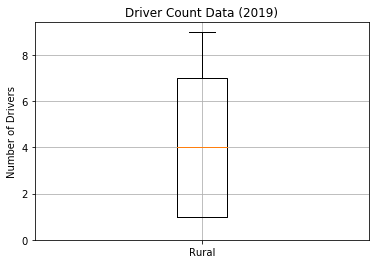

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [217]:
'''SKILL DRILL: Create a box-and-whisker plot for rural cities driver count data. Add titles & labels. 
Add summary stats at bottom.'''

x_labels = ["Rural"]

fig, ax = plt.subplots()

ax.boxplot(rural_drivers, labels=x_labels)

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 10, step=2.0))

ax.grid()

plt.show()

print("Summary Statistics")
rural_drivers.describe()


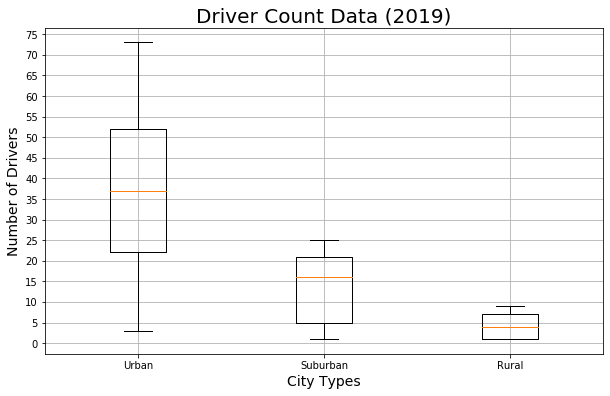

In [222]:
'''SKILL DRILL: Combine all city types driver count data plots into one & additional formatting, and
save as Fig4.png in the "Analysis" folder.'''

x_labels = ["Urban", "Suburban", "Rural"]

drivers_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)

ax.boxplot(drivers_data, labels=x_labels)

ax.set_yticks(np.arange(0, 80, step=5.0))

ax.grid()

plt.savefig("Analysis/Fig4.png")

plt.show()


In [223]:
# FINDINGS: The average number of drivers in rural cities is about 9 times less than in urban cities (36), and about
# 4 times less than in suburban cities (16).

In [224]:
# PIE CHART: Start by creating a Series where the index is the city type ("type") from the pyber_data_df, and the 
# column is the sum of the fares of each city type ("fare").

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [225]:
# PIE CHART: Next, get the total fares using the sum() method on the fare column.

total_fares = pyber_data_df["fare"].sum()

total_fares


63538.64

In [226]:
# PIE CHART: Calculate the percentage of total fares for each city type by dividing the sum_fares_by_type Series by
# the total_fares Series and multiplying by 100.

type_percents = 100 * sum_fares_by_type / total_fares

type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [227]:
# PIE CHART: The same calculation can be entered in one single line of code.

type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()

type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

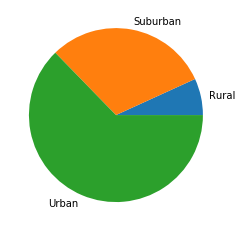

In [228]:
# Bulild the basic percentage of fares by city type PIE CHART.

plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])

plt.show()


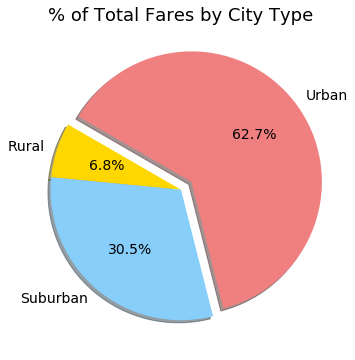

In [234]:
# Format the PIE CHART: There is no fontsize parameter in pie charts, but importing matplotlib as mpl (not the same
# as matplotlib.pyplot) and using it with the rcParams function, font size can be updated.

import matplotlib as mpl

plt.subplots(figsize=(10, 6))

plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
                
plt.title("% of Total Fares by City Type", fontsize=18)

mpl.rcParams['font.size'] = 16

plt.savefig("Analysis/Fig5.png")

plt.show()
                

In [236]:
# Calculate ride percentages by combining the following into one line of code:
# pyber_data_df.groupby(["type"]) and pyber_data_df["ride_id"].count() .


ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()

ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

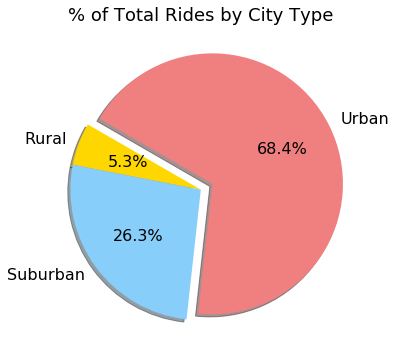

In [237]:
# Create pie chart for percentage of rides by city type.

plt.subplots(figsize=(10, 6))

plt.pie(ride_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
                
plt.title("% of Total Rides by City Type", fontsize=18)

mpl.rcParams['font.size'] = 16

plt.savefig("Analysis/Fig6.png")

plt.show()
